<a href="https://colab.research.google.com/github/susovanpatra00/Deep-Learning-Projects-/blob/main/Music%20Genre%20Classification/Music_Genre_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing Libraries

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio
from sklearn.model_selection import train_test_split, GridSearchCV, ParameterGrid
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from sklearn.metrics import accuracy_score
%matplotlib inline

## Reading Data

In [2]:
data = pd.read_csv('features_3_sec.csv')
test_data = pd.read_csv('features_30_sec.csv')

print("Data Shape : ",data.shape)
data.head(5)

Data Shape :  (9990, 60)


,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.0.wav,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,...,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,blues.00000.1.wav,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,...,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,blues.00000.2.wav,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,...,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,blues.00000.3.wav,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,...,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,blues.00000.4.wav,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,...,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues


## Feature Engeneering

In [3]:
data.length.unique()

array([66149])

In [4]:
# Here we can see that 2 columns ('filename' & 'length') are not of use actually. Because 'filename' won't help us in
#      identifying features and the 'length' is same for all so not of use as this is about audios. So we will drop them.

In [6]:
col_to_drop = ['filename','length']

data = data.drop(data.columns[[0, 1]], axis=1)
test_data = test_data.drop(test_data.columns[[0, 1]], axis=1)

In [7]:
data.head(5)

,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,3714.560359,1.080790e+06,...,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,3869.682242,6.722448e+05,...,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,3997.639160,7.907127e+05,...,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,3568.300218,9.216524e+05,...,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,3469.992864,6.102111e+05,...,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues


In [8]:
test_data.head(5)

,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,3805.839606,9.015054e+05,...,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
1,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,3550.522098,2.977893e+06,...,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,blues
2,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,3042.260232,7.840345e+05,...,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,blues
3,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,2184.745799,1.493194e+06,...,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,blues
4,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,3579.757627,1.572978e+06,...,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,blues


## Feature Extraction

In [9]:
## The Output is in string form...let's convert it to labels of int to simplify it

In [10]:
genres = data.iloc[:, -1]
encoder = LabelEncoder()

y = encoder.fit_transform(genres)
print("No. of Unique Genres : ", np.unique(y))

No. of Unique Genres :  [0 1 2 3 4 5 6 7 8 9]


In [11]:
X = data.iloc[:, :-1]

In [12]:
X

,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,...,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
0,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,3714.560359,1.080790e+06,...,-2.853603,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767
1,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,3869.682242,6.722448e+05,...,4.074709,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081
2,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,3997.639160,7.907127e+05,...,4.806280,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122
3,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,3568.300218,9.216524e+05,...,-1.359111,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678
4,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,3469.992864,6.102111e+05,...,2.092937,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9985,0.349126,0.080515,0.050019,0.000097,1499.083005,164266.886443,1718.707215,85931.574523,3015.559458,8.479527e+05,...,5.773784,42.485981,-9.094270,38.326839,-4.246976,31.049839,-5.625813,48.804092,1.818823,38.966969
9986,0.372564,0.082626,0.057897,0.000088,1847.965128,281054.935973,1906.468492,99727.037054,3746.694524,1.170890e+06,...,2.074155,32.415203,-12.375726,66.418587,-3.081278,54.414265,-11.960546,63.452255,0.428857,18.697033
9987,0.347481,0.089019,0.052403,0.000701,1346.157659,662956.246325,1561.859087,138762.841945,2442.362154,2.602871e+06,...,-1.005473,78.228149,-2.524483,21.778994,4.809936,25.980829,1.775686,48.582378,-0.299545,41.586990
9988,0.387527,0.084815,0.066430,0.000320,2084.515327,203891.039161,2018.366254,22860.992562,4313.266226,4.968878e+05,...,4.123402,28.323744,-5.363541,17.209942,6.462601,21.442928,2.354765,24.843613,0.675824,12.787750


In [13]:
## Here if we analyse the 'X' then we can see that there are some columns where the values are too small and there
## are some columns where the values are huge. So we need to standarize it.

In [14]:
scale = StandardScaler()
X = scale.fit_transform(X)

## Train Test Split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [16]:
print("Train Size : ", len(X_train))
print("Test Size : ", len(X_test))

Train Size :  6993
Test Size :  2997


## Model Creation

In [17]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [18]:
def create_model(model, epochs, optimizer):
    batch_size = 128
    model.compile(optimizer = optimizer,
                 loss = 'sparse_categorical_crossentropy',
                 metrics=['accuracy'])
    return model.fit(X_train, y_train, validation_data= (X_test, y_test),
                     epochs = epochs, batch_size = batch_size,
                     callbacks = early_stopping)

In [19]:
model = Sequential([Dense(512, activation = 'relu'),
                    Dropout(rate=0.25),

                    Dense(256, activation = 'relu'),
                    Dropout(rate=0.25),

                    Dense(128, activation = 'relu'),
                    Dropout(rate=0.25),

                    Dense(64, activation = 'relu'),
                    Dropout(rate=0.25),

                    Dense(32, activation = 'relu'),
                    Dropout(rate=0.25),

                    Dense(10, activation = 'softmax')])

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               29696     
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 64)                8

In [20]:
model_history = create_model(model, epochs = 600, optimizer = 'adam')

Epoch 1/600
55/55 [==============================] - 5s 9ms/step - loss: 1.9328 - accuracy: 0.3006 - val_loss: 1.3911 - val_accuracy: 0.5335
Epoch 2/600
55/55 [==============================] - 0s 5ms/step - loss: 1.4773 - accuracy: 0.4778 - val_loss: 1.0970 - val_accuracy: 0.6373
Epoch 3/600
55/55 [==============================] - 0s 5ms/step - loss: 1.2419 - accuracy: 0.5681 - val_loss: 0.9151 - val_accuracy: 0.6970
Epoch 4/600
55/55 [==============================] - 0s 5ms/step - loss: 1.1074 - accuracy: 0.6282 - val_loss: 0.8246 - val_accuracy: 0.7217
Epoch 5/600
55/55 [==============================] - 0s 8ms/step - loss: 0.9865 - accuracy: 0.6750 - val_loss: 0.7733 - val_accuracy: 0.7444
Epoch 6/600
55/55 [==============================] - 0s 9ms/step - loss: 0.8835 - accuracy: 0.7119 - val_loss: 0.7424 - val_accuracy: 0.7578
Epoch 7/600
55/55 [==============================] - 0s 8ms/step - loss: 0.8177 - accuracy: 0.7326 - val_loss: 0.6490 - val_accuracy: 0.7881
Epoch 8/600
5

In [22]:
X_new = test_data.iloc[:, :-1]
y_new = test_data.iloc[:, -1]

y_new = encoder.transform(y_new)
X_new = scale.transform(X_new)

In [28]:
X_new.shape

(1000, 57)

In [23]:
predictions = model.predict(X_new)

32/32 [==============================] - 0s 4ms/step


In [29]:
reshaped_predictions = predictions.argmax(axis=1)
predicted_genres = encoder.inverse_transform(reshaped_predictions)

In [36]:
y_new = encoder.inverse_transform(y_new)
accuracy = accuracy_score(y_new, predicted_genres)
print("Accuracy on New Dataset: {:.2f}%".format(accuracy * 100))

Accuracy on New Dataset: 98.70%


So we got 98.7% accuracy on test data and 90.76% accuracy on validation data

## History Summarization

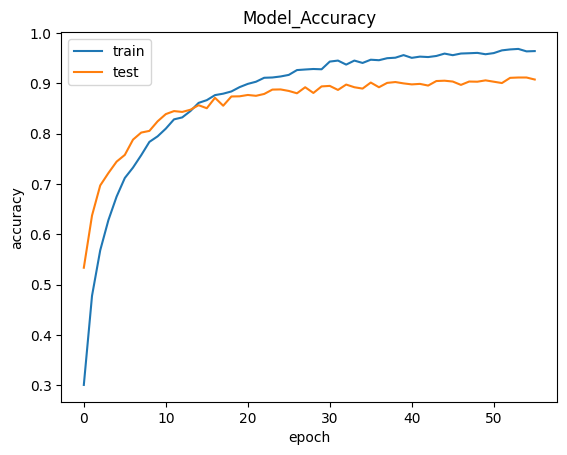

In [38]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model_Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()